### Appendix

#### Python Code for Credit Card Fraud detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # if you want to use seaborn themes with matplolib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 42

In [3]:
df = pd.read_csv("creditcard.csv")
LABELS = ["Normal","Fraud"]

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
#print("Number of columns: {}".format(df.shape[1]))
#print("Number of rows: {}".format(df.shape[0]))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# lets take a look at target variable proportions
pd.crosstab(df['Class'],df['Class'],normalize = "all")*100

Class,0,1
Class,,
0,99.827251,0.000000
1,0.000000,0.172749


#### 0.17% are fraud transaction out of all transaction. Data is highly unbalanced. Before addressing this issue lets calculate accuracy, recall, precision using Logistic, Decision Tree and RandomForest

#### EDA

In [12]:
df.shape

(284807, 31)

In [13]:
df.isnull().values.any()

False

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
# Drop Time column since its not required for our analysis
df = df.drop(['Time'], axis =1)

In [17]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [18]:
df.duplicated().any()

True

In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(275663, 30)

In [21]:
class_count = df['Class'].value_counts()
print(class_count)

Class
0    275190
1       473
Name: count, dtype: int64


Text(0, 0.5, 'Freq')

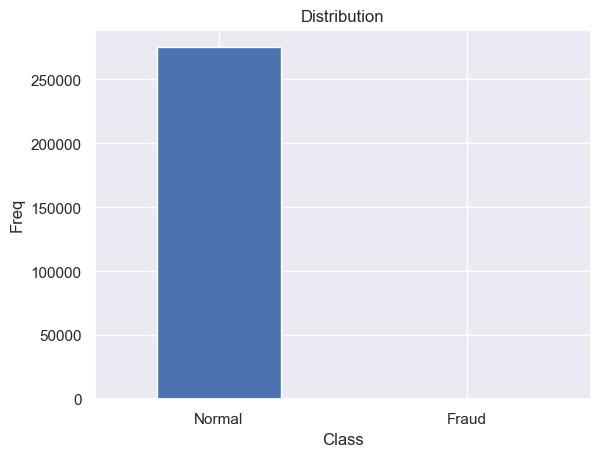

In [22]:
count_class = pd.value_counts(df['Class'],sort = True)
count_class.plot(kind = 'bar', rot = 0)
plt.title("Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Freq")

In [23]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

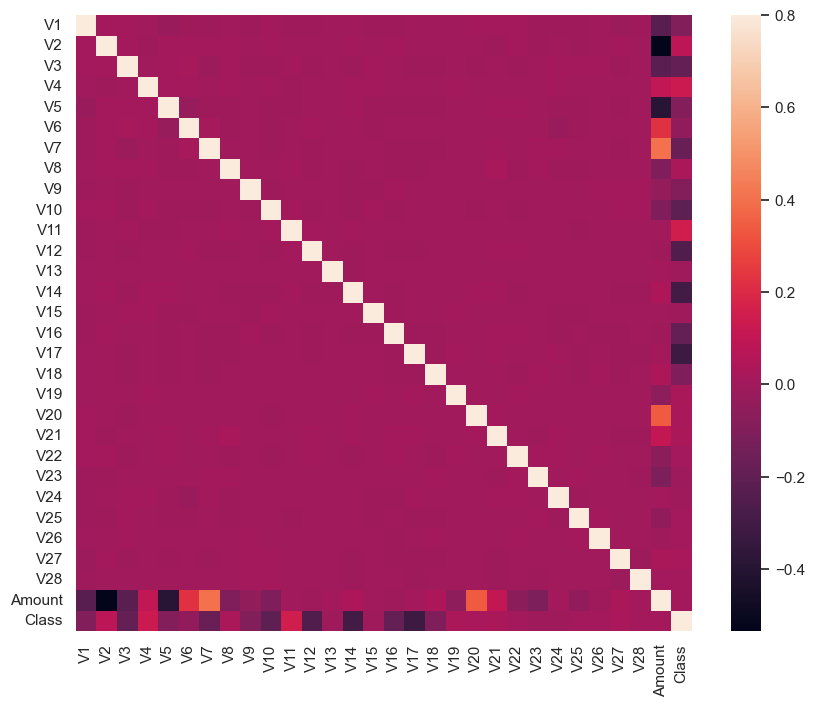

In [24]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (10, 8))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Majority features do not correlate but few features that either has a positive or a negative correlation with each other. Eg V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount.

In [26]:
# Dividing the X and the Y from the dataset
X = df.drop(['Class'], axis = 1)
y = df["Class"]
print(X.shape)
print(y.shape)
#print(X.columns.tolist())

(275663, 29)
(275663,)


### Split the data in Training and Test

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = rand_state)

In [29]:
print(pd.Series(y_train).value_counts(normalize=True))

Class
0    0.998268
1    0.001732
Name: proportion, dtype: float64


In [30]:
print('X Train size: ', X_train.shape)
print('X Test size: ', X_test.shape)
print('X Test proportion:', round((len(X_test) / (len(X_train) + len(X_test))) * 100, 2), '%')
print('\nY Train size: ', y_train.shape)
print('Y Test size: ', y_test.shape)
print('Y Test proportion:', round((len(y_test) / (len(y_train) + len(y_test))) * 100, 2), '%')

X Train size:  (220530, 29)
X Test size:  (55133, 29)
X Test proportion: 20.0 %

Y Train size:  (220530,)
Y Test size:  (55133,)
Y Test proportion: 20.0 %


In [31]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
82602,-0.697561,0.948635,-0.265964,0.232319,2.234194,3.852625,-0.207872,1.360338,-0.780520,-0.483250,...,0.089137,-0.041381,-0.234344,-0.225184,1.016926,0.380123,-0.203681,0.008106,0.036948,-0.276746
125045,1.264899,0.049540,-0.952775,-0.070600,2.065511,3.424647,-0.528821,0.854294,-0.038103,0.022971,...,-0.000144,-0.327823,-1.124423,0.106592,0.943713,0.444564,-0.678490,0.031086,0.027166,-0.313448
1779,-0.715606,0.513689,0.961015,-1.198394,0.583521,-0.829520,1.320615,-0.439369,0.047655,0.408184,...,0.260249,-0.127502,0.058932,-0.101983,0.020072,-0.306188,0.765075,0.049670,-0.194371,-0.158283
90892,-2.139310,2.097059,-0.022686,1.456046,-1.022387,-0.087631,-0.754045,1.604350,-1.025693,-0.911668,...,-0.457860,0.226124,0.268603,-0.026230,0.126653,0.009085,-0.258654,-0.702756,-0.163966,-0.293298
107921,-3.026331,1.801124,-1.896878,-2.520847,0.718708,3.298411,-1.318774,1.332548,-0.953841,1.280528,...,-0.349800,0.232285,-1.248408,0.180337,0.949543,0.119986,0.203583,-0.131442,-0.253182,-0.153365


In [32]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
275693,-0.190398,0.698232,1.396916,1.243184,0.063649,-0.053054,0.586590,0.039337,0.185185,-0.479029,...,-0.012913,-0.392453,-0.897569,0.202906,-0.025012,-0.804131,-1.011983,0.256706,0.216540,-0.234606
94607,-2.899712,1.147393,-0.379727,-2.019742,-0.850174,-0.542774,-0.282444,1.171072,-1.238802,1.035428,...,0.109703,-0.278207,-0.533206,0.303149,-0.362806,0.292613,-0.614168,0.325406,-0.091687,-0.157323
283229,-5.900967,5.307300,-5.032880,-0.777607,-2.932475,-1.526561,-2.838857,4.269784,0.373968,1.193923,...,0.169689,0.477784,0.987827,0.589001,-0.374808,0.011107,-0.148117,0.305026,0.321032,-0.349671
56997,-1.079251,0.175778,1.951516,-1.261280,0.354781,-0.661683,0.373771,0.110145,-0.532230,-0.828617,...,0.171030,0.005327,-0.294513,-0.116603,0.036575,0.178164,0.821761,-0.084983,0.048851,-0.199623
33012,1.211723,-1.048916,0.811722,-0.615885,-1.230005,0.314754,-1.137566,0.159100,-0.081684,0.428462,...,0.213396,0.344109,0.943646,-0.206715,-0.405956,0.433022,0.008947,0.052303,0.029570,-0.020749


### Model Evaluation

### 1. Logsitic regression with sklearn

In [35]:
from sklearn.linear_model import LogisticRegression

# fitting logistic regresson to the training set
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

#### Predicting the test set probablities and classes

In [37]:
y_hat = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1]

In [38]:
y_pred = logistic.predict(X_test)

In [39]:
np.round(logistic.predict_proba(X_test),3)

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       ...,
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.999, 0.001]])

In [40]:
np.max(y_hat_probs)

0.9999999999975673

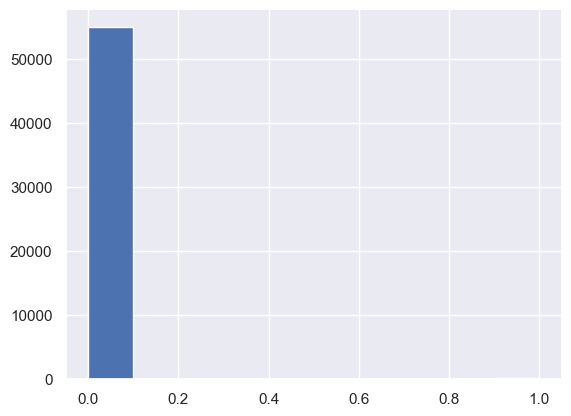

In [41]:
plt.hist(y_hat_probs)
plt.show()

In [42]:
y_hat_10 = np.where(y_hat_probs>0.10,1,0)
y_hat_30 = np.where(y_hat_probs>0.30,1,0)

In [43]:
df_predictions = pd.DataFrame({'y_test':y_test,'y_hat_probs':y_hat_probs,
                             'y_hat_10':y_hat_10,'y_hat_30':y_hat_30})
df_predictions.head()

,y_test,y_hat_probs,y_hat_10,y_hat_30
275693,0,0.000333,0,0
94607,0,0.000004,0,0
283229,0,0.000002,0,0
56997,0,0.000122,0,0
33012,0,0.000120,0,0


In [44]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.89      0.60      0.72        91

    accuracy                           1.00     55133
   macro avg       0.94      0.80      0.86     55133
weighted avg       1.00      1.00      1.00     55133



In [46]:
print(f"Logistic Regression")
print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"\n Precision: {precision_score(y_test, y_pred)}")
print(f"\n Recall: {recall_score(y_test, y_pred)}")
print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

Logistic Regression

 Accuracy: 0.9992200678359603

 Precision: 0.8870967741935484

 Recall: 0.6043956043956044

 F1 Score: 0.718954248366013


In [47]:
# Printing Evaluation Metrics for Logistic regression
metrics_LR = [['Accuracy',(accuracy_score(y_test, y_pred))],
                         ['Precision',precision_score(y_test, y_pred)],
                         ['Recall', recall_score(y_test, y_pred)],
                         ['F1_score',f1_score(y_test, y_pred)]]
metrics_LR = pd.DataFrame(metrics_LR, columns = ['Metrics', 'Logistic Regression'])
metrics_LR

,Metrics,Logistic Regression
0,Accuracy,0.999220
1,Precision,0.887097
2,Recall,0.604396
3,F1_score,0.718954


In [48]:
print(confusion_matrix(y_test, y_pred))

[[55035     7]
 [   36    55]]


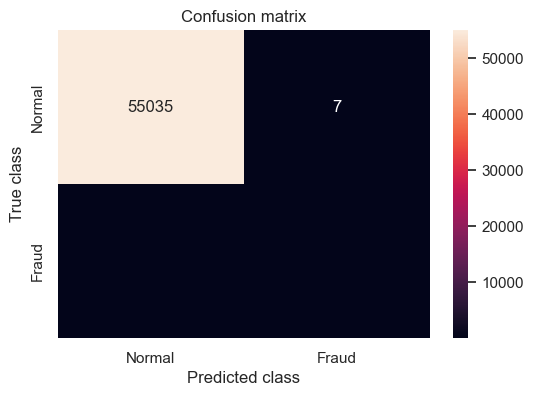

In [49]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(6, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d"  );
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

__Row 1 --> Normal:__

__56836__    : True Negatives (TN) — The model correctly predicted "Normal" transactions.

__7__: False Positives (FP) — The model incorrectly predicted "Fraud" for transactions that are actually "Normal".


__Row 2  --> Fraud:__

__36__: False Negatives (FN) — The model incorrectly predicted "Normal" for transactions that are actually "Fraud".

__55__: True Positives (TP) — The model correctly predicted "Fraud" transactions.

### 2. Decison Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
# fitting Decision Tree to the training set

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
decision_y_pred = DecisionTree.predict(X_test)
#y_hat_probs = logistic.predict_proba(X_test)[:,1]

In [54]:
print(classification_report(y_test, decision_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.71      0.75      0.73        91

    accuracy                           1.00     55133
   macro avg       0.85      0.87      0.86     55133
weighted avg       1.00      1.00      1.00     55133



In [55]:
print(f"Decision Tree Regression")
print(f"\n Accuracy: {accuracy_score(y_test, decision_y_pred)}")
print(f"\n Precision: {precision_score(y_test, decision_y_pred)}")
print(f"\n Recall (also called sensitivity): {recall_score(y_test, decision_y_pred)}")
print(f"\n F1 Score (harmonic mean): {f1_score(y_test, decision_y_pred)}")

Decision Tree Regression

 Accuracy: 0.9990749641775343

 Precision: 0.7083333333333334

 Recall (also called sensitivity): 0.7472527472527473

 F1 Score (harmonic mean): 0.7272727272727272


In [56]:
# Printing Evaluation Metrics for Decison Tree
metrics_DT = [['Accuracy',(accuracy_score(y_test, decision_y_pred))],
                         ['Precision',precision_score(y_test, decision_y_pred)],
                         ['Recall', recall_score(y_test, decision_y_pred)],
                         ['F1_score',f1_score(y_test, decision_y_pred)]]
metrics_DT = pd.DataFrame(metrics_DT, columns = ['Metrics', 'Decision Tree'])
metrics_DT

,Metrics,Decision Tree
0,Accuracy,0.999075
1,Precision,0.708333
2,Recall,0.747253
3,F1_score,0.727273


In [57]:
# Create a DataFrame for Decision Tree
metrics_DT = pd.DataFrame(metrics_DT, columns=['Metrics', 'Decision Tree'])

# Merge the two DataFrames on the 'Metrics' column
metrics_combined = pd.merge(metrics_LR, metrics_DT, on='Metrics')

# Display the combined DataFrame
metrics_combined

,Metrics,Logistic Regression,Decision Tree
0,Accuracy,0.999220,0.999075
1,Precision,0.887097,0.708333
2,Recall,0.604396,0.747253
3,F1_score,0.718954,0.727273


In [58]:
print(confusion_matrix(y_test, decision_y_pred))

[[55014    28]
 [   23    68]]


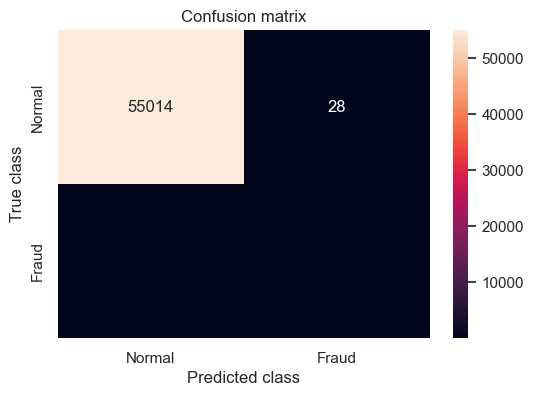

In [59]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, decision_y_pred)
plt.figure(figsize =(6, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d"  );
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

__Row 1 --> Normal:__

55006    : True Negatives (TN) — The model correctly predicted "Normal" transactions.

36: False Positives (FP) — The model incorrectly predicted "Fraud" for transactions that are actually "Normal".


__Row 2 --> Fraud:__

28: False Negatives (FN) — The model incorrectly predicted "Normal" for transactions that are actually "Fraud".

63: True Positives (TP) — The model correctly predicted "Fraud" transactions.

### 3. Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
# fitting Random Forest regresson to the training set

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
RF_y_pred = RandomForest.predict(X_test)
#y_hat_probs = logistic.predict_proba(X_test)[:,1]

In [64]:
print(classification_report(y_test, RF_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.91      0.74      0.81        91

    accuracy                           1.00     55133
   macro avg       0.95      0.87      0.91     55133
weighted avg       1.00      1.00      1.00     55133



In [65]:
print(f"RandomForest Regression")
print(f"\n Accuaracy: {accuracy_score(y_test, RF_y_pred)}")
print(f"\n Precision: {precision_score(y_test, RF_y_pred)}")
print(f"\n Recall: {recall_score(y_test, RF_y_pred)}")
print(f"\n F1 Score: {f1_score(y_test, RF_y_pred)}")

RandomForest Regression

 Accuaracy: 0.9994377233235993

 Precision: 0.9054054054054054

 Recall: 0.7362637362637363

 F1 Score: 0.8121212121212122


In [66]:
# Printing ROC AUC scores
from sklearn.metrics import roc_auc_score
print('Logistic Regression ROC AUC Score: ', (roc_auc_score(y_test, y_pred) * 100).round(2))
print('Decision Tree ROC AUC Score: ', (roc_auc_score(y_test, decision_y_pred) * 100).round(2))
print('Random Forest ROC AUC Score: ', (roc_auc_score(y_test, RF_y_pred) * 100).round(2))

Logistic Regression ROC AUC Score:  80.21
Decision Tree ROC AUC Score:  87.34
Random Forest ROC AUC Score:  86.81


In [67]:
# Printing Evaluation Metrics for AB
metrics_RF = [['Accuracy',(accuracy_score(y_test, RF_y_pred))],
                         ['Precision',precision_score(y_test, RF_y_pred)],
                         ['Recall', recall_score(y_test, RF_y_pred)],
                         ['F1_score',f1_score(y_test, RF_y_pred)]]
metrics_RF = pd.DataFrame(metrics_RF, columns = ['Metrics', 'Random Forest'])

# Merge the two DataFrames on the 'Metrics' column
metrics_combined = pd.merge(metrics_combined, metrics_RF, on='Metrics')

In [68]:
# Display the combined DataFrame
metrics_combined

,Metrics,Logistic Regression,Decision Tree,Random Forest
0,Accuracy,0.999220,0.999075,0.999438
1,Precision,0.887097,0.708333,0.905405
2,Recall,0.604396,0.747253,0.736264
3,F1_score,0.718954,0.727273,0.812121


In [69]:
print(confusion_matrix(y_test, RF_y_pred))

[[55035     7]
 [   24    67]]


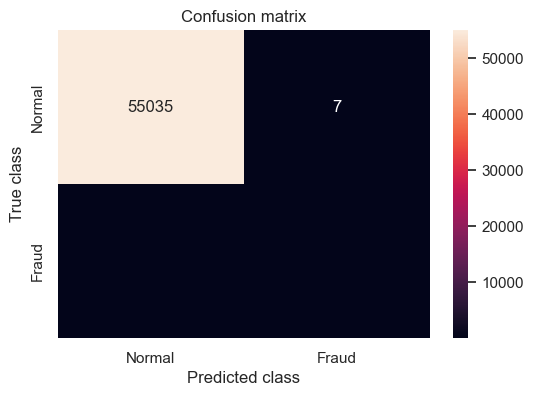

In [70]:
# printing the confusion matrix
#LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize =(6, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

__Row 1 --> Normal:__

56863    : True Negatives (TN) — The model correctly predicted "Normal" transactions.

1: False Positives (FP) — The model incorrectly predicted "Fraud" for transactions that are actually "Normal".


__Row 2  --> Fraud:__

22: False Negatives (FN) — The model incorrectly predicted "Normal" for transactions that are actually "Fraud".

76: True Positives (TP) — The model correctly predicted "Fraud" transactions.

In [72]:
# feature importance

importance = RandomForest.feature_importances_
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values('Importance',ascending = False)
feature_imp.head()

,Feature,Importance
16,V17,0.173239
11,V12,0.139373
13,V14,0.124583
9,V10,0.071338
10,V11,0.070486


Above feature is represent highes impact on RF model. Feature importance measures how much feature contributes to reduce the impurtities between trees. Higher value indicates greater importance.

#### All 3 models are yeilding high accuracy but low recall. 

TP is for True Positive and it shows the correct predictions of a model for a positive class.

FP is for False Positive and it shows the incorrect predictions of a model for a positive class.

FN is for False Negative and it shows the incorrect predictions of a model for a negative class.

TN is for True Negative and it shows the correct predictions of a model for a negative class.


#### Since the data is imbalanced we can using resampling method to yeild balanced dataset. This method adjust the balance between minority and majority classes.

### Oversampling

For oversampling we will use majority class

In [79]:
X = df.drop('Class', axis = 1)
y= df['Class']

In [80]:
X.shape

(275663, 29)

In [81]:
y.shape

(275663,)

In [82]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y) # Reshaping data

In [83]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

#### Now lets fit logistic and decision tree

In [86]:
# fitting logistic regresson to the training set
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [87]:
logistic_model = logistic.fit(X_train,y_train)

In [88]:
y_pred_LR_O = logistic.predict(X_test)

In [89]:
print(classification_report(y_test, y_pred_LR_O))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     55073
           1       0.97      0.91      0.94     55003

    accuracy                           0.94    110076
   macro avg       0.95      0.94      0.94    110076
weighted avg       0.95      0.94      0.94    110076



In [90]:
print(f"Logistic Regression")
print(f"\n Accuaracy: {accuracy_score(y_test, y_pred_LR_O)}")
print(f"\n Precision: {precision_score(y_test, y_pred_LR_O)}")
print(f"\n Recall: {recall_score(y_test, y_pred_LR_O)}")
print(f"\n F1 Score: {f1_score(y_test, y_pred_LR_O)}")

Logistic Regression

 Accuaracy: 0.9432392165412987

 Precision: 0.9731565769297956

 Recall: 0.9115502790756868

 F1 Score: 0.9413465510119785


In [91]:
# Printing Evaluation Metrics for AB
metrics_LR_O = [['Accuracy',(accuracy_score(y_test, y_pred_LR_O))],
                         ['Precision',precision_score(y_test, y_pred_LR_O)],
                         ['Recall', recall_score(y_test, y_pred_LR_O)],
                         ['F1_score',f1_score(y_test, y_pred_LR_O)]]
metrics_LR_O = pd.DataFrame(metrics_LR_O, columns = ['Metrics', 'LR_After_Oversampling'])
metrics_LR_O
# Merge the two DataFrames on the 'Metrics' column
#metrics_combined = pd.merge(metrics_combined, metrics_LR_O, on='Metrics')

,Metrics,LR_After_Oversampling
0,Accuracy,0.943239
1,Precision,0.973157
2,Recall,0.911550
3,F1_score,0.941347


In [92]:
#print(confusion_matrix(y_test, y_pred_LR_O))

In [93]:
# Decision Tree Classifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
decision_y_pred_O = DecisionTree.predict(X_test)

In [95]:
print(f"Decision Tree Regression")
print(f"\n Accuracy: {accuracy_score(y_test, decision_y_pred_O)}")
print(f"\n Precision: {precision_score(y_test, decision_y_pred_O)}")
print(f"\n Recall: {recall_score(y_test, decision_y_pred_O)}")
print(f"\n F1 Score: {f1_score(y_test, decision_y_pred_O)}")

Decision Tree Regression

 Accuracy: 0.9980377193938733

 Precision: 0.9972950894072796

 Recall: 0.998781884624475

 F1 Score: 0.9980379332897318


In [96]:
# Printing Evaluation Metrics for DT after oversampling
metrics_DT_O = [['Accuracy',(accuracy_score(y_test, decision_y_pred_O))],
                         ['Precision',precision_score(y_test, decision_y_pred_O)],
                         ['Recall', recall_score(y_test, decision_y_pred_O)],
                         ['F1_score',f1_score(y_test, decision_y_pred_O)]]
metrics_DT_O = pd.DataFrame(metrics_DT_O, columns = ['Metrics', 'DT_Oversampling'])

# Merge the two DataFrames on the 'Metrics' column
metrics_O_combined = pd.merge(metrics_LR_O, metrics_DT_O, on='Metrics')
metrics_O_combined

,Metrics,LR_After_Oversampling,DT_Oversampling
0,Accuracy,0.943239,0.998038
1,Precision,0.973157,0.997295
2,Recall,0.911550,0.998782
3,F1_score,0.941347,0.998038


In [97]:
print(confusion_matrix(y_test, decision_y_pred_O))

[[54924   149]
 [   67 54936]]


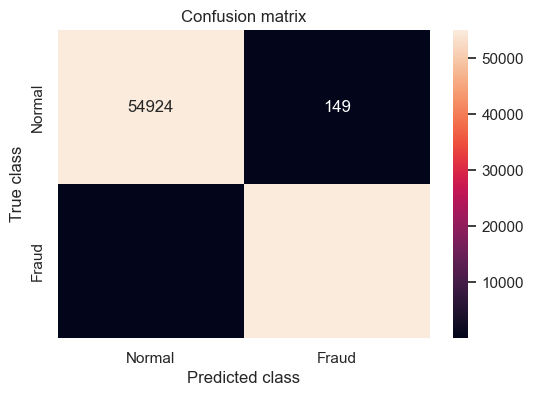

In [98]:
conf_matrix_DTO = confusion_matrix(y_test, decision_y_pred_O)
plt.figure(figsize =(6, 4))
sns.heatmap(conf_matrix_DTO, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [99]:
# Random Forest Classifier
RandomForest = RandomForestClassifier()
#RandomForest.fit(X_train,y_train)

In [100]:
random_forest_model = RandomForest.fit(X_train,y_train)

In [101]:
random_forest_model

RandomForestClassifier()

In [102]:
RF_y_pred_O = RandomForest.predict(X_test)

In [103]:
print(classification_report(y_test, RF_y_pred_O))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



In [104]:
print(f"RandomForest Regression")
print(f"\n Accuaracy: {accuracy_score(y_test, RF_y_pred_O)}")
print(f"\n Precision: {precision_score(y_test, RF_y_pred_O)}")
print(f"\n Recall: {recall_score(y_test, RF_y_pred_O)}")
print(f"\n F1 Score: {f1_score(y_test, RF_y_pred_O)}")

RandomForest Regression

 Accuaracy: 0.9999091536756423

 Precision: 0.999818224783233

 Recall: 1.0

 F1 Score: 0.9999091041303083


In [105]:
# Printing Evaluation Metrics for DT after oversampling
metrics_RF_O = [['Accuracy',(accuracy_score(y_test, RF_y_pred_O))],
                         ['Precision',precision_score(y_test, RF_y_pred_O)],
                         ['Recall', recall_score(y_test, RF_y_pred_O)],
                         ['F1_score',f1_score(y_test, RF_y_pred_O)]]
metrics_RF_O = pd.DataFrame(metrics_RF_O, columns = ['Metrics', 'RF_Oversampling'])

# Merge the two DataFrames on the 'Metrics' column
metrics_O_combined = pd.merge(metrics_O_combined, metrics_RF_O, on='Metrics')
metrics_O_combined

,Metrics,LR_After_Oversampling,DT_Oversampling,RF_Oversampling
0,Accuracy,0.943239,0.998038,0.999909
1,Precision,0.973157,0.997295,0.999818
2,Recall,0.911550,0.998782,1.000000
3,F1_score,0.941347,0.998038,0.999909


In [106]:
print(confusion_matrix(y_test, RF_y_pred_O))

[[55063    10]
 [    0 55003]]


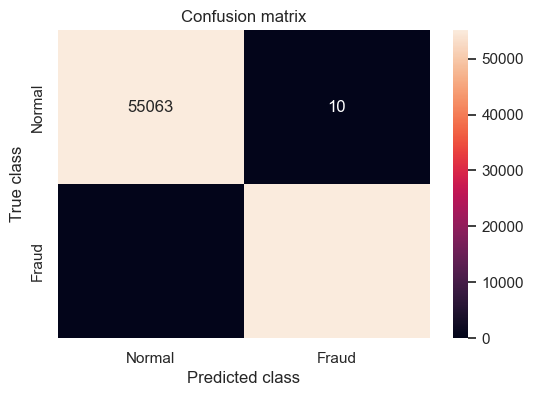

In [107]:
conf_matrix_RFO = confusion_matrix(y_test, RF_y_pred_O)
plt.figure(figsize =(6, 4))
sns.heatmap(conf_matrix_RFO, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [108]:
# feature importance

importance = RandomForest.feature_importances_
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values('Importance',ascending = False)
feature_imp.head()

,Feature,Importance
13,V14,0.195371
11,V12,0.096162
10,V11,0.094021
3,V4,0.093729
9,V10,0.090178


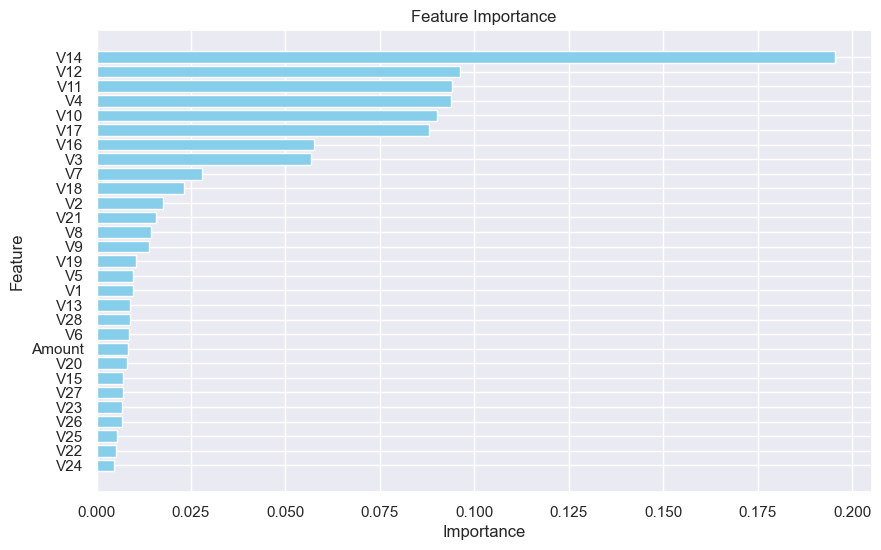

In [109]:
# Plotting the feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [110]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [111]:
# Printing ROC AUC scores
from sklearn.metrics import roc_auc_score
print('Logistic Regression ROC AUC Score: ', (roc_auc_score(y_test, y_pred_LR_O) * 100).round(2))
print('Decision Tree ROC AUC Score: ', (roc_auc_score(y_test, decision_y_pred_O) * 100).round(2))
print('Random Forest ROC AUC Score: ', (roc_auc_score(y_test, RF_y_pred_O) * 100).round(2))

Logistic Regression ROC AUC Score:  94.32
Decision Tree ROC AUC Score:  99.8
Random Forest ROC AUC Score:  99.99


In [112]:
y_pred_proba = RandomForest.predict_proba(X_test)[:,1]
fpr,tpr, _ = roc_curve(y_test, y_pred_proba)

In [113]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)

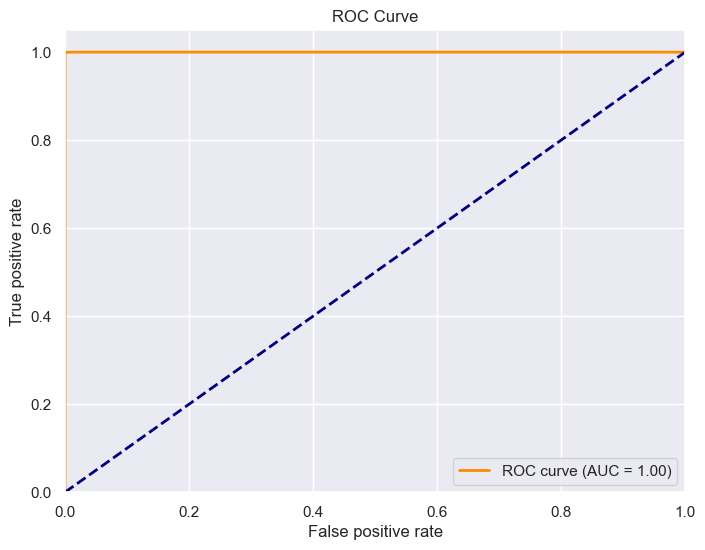

In [114]:
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color = 'navy', lw =2, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC Curve")
plt.legend(loc = 'lower right')
plt.show()

In [115]:
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
#y_pred_randf = random_forest_model.predict_proba(X_test)[:, 1]

In [116]:
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic})

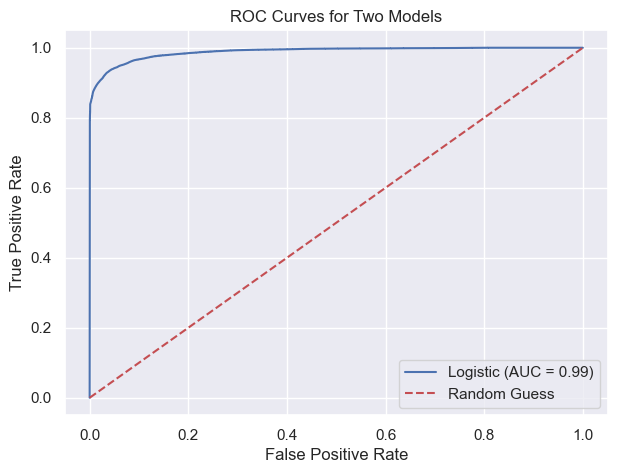

In [117]:
plt.figure(figsize=(7, 5))

for model in ['Logistic']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

### Lets use Ensemble method.

#### ADA Boost

In [119]:
# dividing the X and the Y from the dataset
X = df.drop(['Class'], axis = 1)
y = df["Class"]
print(X.shape)
print(y.shape)

(275663, 29)
(275663,)


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = rand_state)

In [121]:
from sklearn.ensemble import AdaBoostClassifier
# Applying Ada Boost Classifier 
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 42)
ada_boost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [122]:
y_predictions_ab = ada_boost.predict(X_test)

In [123]:
print(f"ADA Boost")
print(f"\n Accuaracy: {accuracy_score(y_test, y_predictions_ab)}")
print(f"\n Precision: {precision_score(y_test, y_predictions_ab)}")
print(f"\n Recall: {recall_score(y_test, y_predictions_ab)}")
print(f"\n F1 Score: {f1_score(y_test, y_predictions_ab)}")

ADA Boost

 Accuaracy: 0.9992382057932636

 Precision: 0.8024691358024691

 Recall: 0.7142857142857143

 F1 Score: 0.7558139534883721


In [124]:
# Printing Evaluation Metrics for AB
metrics_ab = [['Accuracy',(accuracy_score(y_test, y_predictions_ab))],
                         ['Precision',precision_score(y_test, y_predictions_ab)],
                         ['Recall', recall_score(y_test, y_predictions_ab)],
                         ['F1_score',f1_score(y_test, y_predictions_ab)]]
metrics_ab = pd.DataFrame(metrics_ab, columns = ['Metrics', 'Results_AB'])
metrics_ab

,Metrics,Results_AB
0,Accuracy,0.999238
1,Precision,0.802469
2,Recall,0.714286
3,F1_score,0.755814


In [125]:
# Applying Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 42)
gradient_boosting.fit(X_train, y_train)

y_prediction_gb = gradient_boosting.predict(X_test)

In [126]:
# Printing Evaluation Metrics for GB
metrics_gb = [['Accuracy',(accuracy_score(y_test, y_prediction_gb))],
                         ['Precision',precision_score(y_test, y_prediction_gb)],
                         ['Recall', recall_score(y_test, y_prediction_gb)],
                         ['F1_score',f1_score(y_test, y_prediction_gb)]]
metrics_gb = pd.DataFrame(metrics_gb, columns = ['Metrics', 'Results_GB'])
metrics_gb

,Metrics,Results_GB
0,Accuracy,0.998603
1,Precision,0.718750
2,Recall,0.252747
3,F1_score,0.373984
